In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
import pickle
warnings.filterwarnings("ignore")
%matplotlib inline

In [44]:
data = pd.read_csv('cbdata/clickbait-or-not.csv', encoding='latin1', sep=',', usecols=range(2))
# Remove rows with missing values
data.dropna(inplace=True)
data['word_count'] = data['data'].apply(lambda x: len(x.split()))
filtered_df = data[data['word_count'] <= 50]
# Drop the 'word_count' column if you don't need it anymore
filtered_df = filtered_df.drop(columns=['word_count'])
filtered_df.head()

,label,data
0,clickbait,You have been APPROVED for ratesstarting as lo...
1,clickbait,TONDKOCUEMAHHDIILB CUA (095) 258-00-83N10-HACT...
2,clickbait,#NAME?
3,clickbait,ae |
4,clickbait,ro (095) 258-00-83by > www.sobak.netfe .sobak....


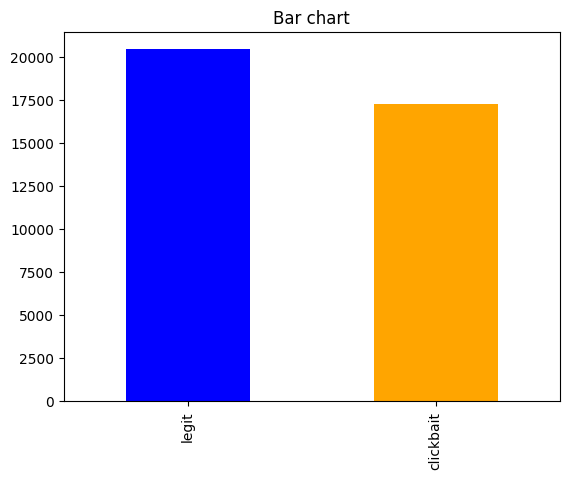

In [45]:
count_Class=pd.value_counts(data["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

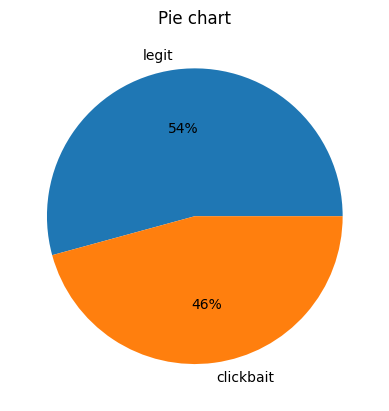

In [46]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [47]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["data"])
np.shape(X)

(37725, 29174)

In [48]:
data["label"]=data["label"].map({'clickbait':1,'legit':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label'], test_size=0.2, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(30180, 29174), (7545, 29174)]


In [60]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [61]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.942942,0.853280,0.835960,0.840129
1,0.11001,0.929556,0.870908,0.867484,0.851088
2,0.22001,0.926143,0.871836,0.869527,0.851386
3,0.33001,0.923625,0.873426,0.871278,0.853101
4,0.44001,0.921306,0.872498,0.871278,0.851398
5,0.55001,0.919218,0.873161,0.873030,0.851409
6,0.66001,0.918091,0.873956,0.873614,0.852464
7,0.77001,0.917164,0.874354,0.874489,0.852590
8,0.88001,0.916236,0.874486,0.873905,0.853235
9,0.99001,0.915043,0.873824,0.872738,0.852824


In [62]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             10.230010
Train Accuracy     0.892081
Test Accuracy      0.868920
Test Recall        0.845884
Test Precision     0.862757
Name: 93, dtype: float64

In [63]:
models[models['Test Precision']>=0.8].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.942942,0.853280,0.835960,0.840129
1,0.11001,0.929556,0.870908,0.867484,0.851088
2,0.22001,0.926143,0.871836,0.869527,0.851386
3,0.33001,0.923625,0.873426,0.871278,0.853101
4,0.44001,0.921306,0.872498,0.871278,0.851398


In [44]:
best_index = models[models['Test Precision']>=0.8]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             0.220010
Train Accuracy    0.968878
Test Accuracy     0.936071
Test Recall       0.942431
Test Precision    0.916193
Name: 2, dtype: float64

In [64]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,3648,471
Actual 1,562,2864


In [68]:
pickle.dump(bayes , open('final.pkl' , 'wb'))
vec_file = 'vectorizer.pickle'
pickle.dump(f, open(vec_file, 'wb'))

# Inference from saved model 

In [66]:
# Inference the saved mode and predict the text spam or not spam
text = 'The University of Adelaide logo 150th Celebration Current Students saff'
exa = [text]

text1 ="I HAVE A DATE ON tuesday WITH WILL!!"
exa1 = [text1]

In [69]:
spam_model1 = open('final.pkl','rb')
bayes_from_pickle = joblib.load(spam_model1)

In [70]:
text_vector = f.transform(exa)
result = bayes_from_pickle.predict(text_vector)
if result == 1:
    print("The is spam")
else :
    print("not spam")

not spam
